In [129]:
import pandas as pd

In [130]:
data_path = './creditcard.csv'
raw_data = pd.read_csv(data_path)
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [131]:
# 특성 - 감춰져 있음(개인정보)
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

- 데이터 라벨의 불균형이 심함. 

In [132]:
raw_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

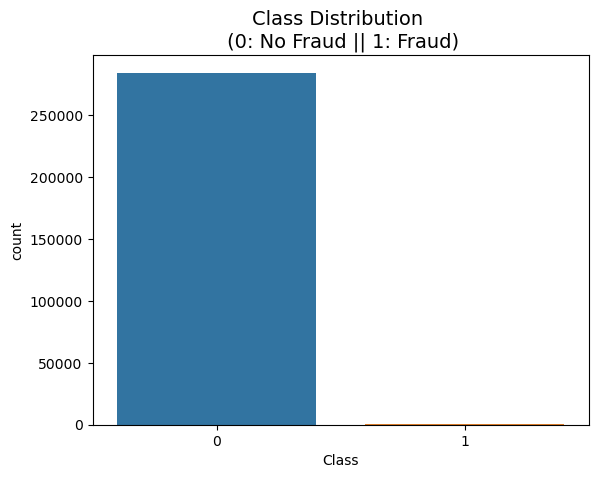

In [134]:
sns.countplot(x='Class', data=raw_data)
plt.title('Class Distribution \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

- X, y로 데이터 선정

In [135]:
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [136]:
X = raw_data.iloc[:, 1:-1]  # V1 부터 Amount column 선정

In [137]:
X = raw_data.iloc[:, 1:-1]
y = raw_data.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

- 데이터 나누기

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)  # stratify: 불균형성

- 나눈 데이터의 불균형 정도 확인

In [139]:
import numpy as np

np.unique(y_train, return_counts=True)

(array([0, 1]), array([199020,    344]))

In [140]:
np.unique(y_train, return_counts=True)[0]

array([0, 1])

In [141]:
np.unique(y_train, return_counts=True)[1]

array([199020,    344])

In [142]:
np.unique(y_train, return_counts=True)[1][1]

344

In [143]:
print(np.unique(y_train, return_counts=True)[1][1] / len(y_train) * 100, '%')

0.17254870488152324 %


## 1st trial

- 분류기의 성능을 return해주는 함수 하나 작성

In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    return acc, pre, re, f1, auc


- 성늘 출력하는 함수 하나 더

In [145]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pre):
    confusion = confusion_matrix(y_test, pre)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pre)

    print('===> Confusion matrix')
    print(confusion)
    print('======================')

    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0:.4f}, Precision: {1:.4f}, AUC: {2:.4f}'.format(re, f1, auc))

In [146]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([85295,   148]))

--> test 데이터에 fraud data 148개

### LogisticRegression

In [147]:
%%time

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

===> Confusion matrix
[[85284    11]
 [   60    88]]
Accuracy: 0.9992, Precision: 0.8889
Recall: 0.5946, Precision: 0.7126, AUC: 0.7972
CPU times: user 4.12 s, sys: 441 ms, total: 4.56 s
Wall time: 3.86 s


- 85295개의 정상 데이터 중 11개를 fraud라고 오해
- 148개의 fraud 데이터 중 60개 틀림. 
- accuracy가 높아 보이지만 recall을 보면 사기범 59%밖에 못 잡음. 

### DecisionTree

In [148]:
%%time

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

===> Confusion matrix
[[85281    14]
 [   42   106]]
Accuracy: 0.9993, Precision: 0.8833
Recall: 0.7162, Precision: 0.7910, AUC: 0.8580
CPU times: user 4.35 s, sys: 242 ms, total: 4.59 s
Wall time: 3.84 s


- DT는 42개 틀림. 
- 더 끌어올릴 수 있나?

### RandomForest

In [149]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

===> Confusion matrix
[[85290     5]
 [   38   110]]
Accuracy: 0.9995, Precision: 0.9565
Recall: 0.7432, Precision: 0.8365, AUC: 0.8716
CPU times: user 4min 26s, sys: 1.5 s, total: 4min 28s
Wall time: 37.1 s


- 38개 틀림. 

### LightGBM

In [150]:
%%time

from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, 
                            boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

===> Confusion matrix
[[85289     6]
 [   34   114]]
Accuracy: 0.9995, Precision: 0.9500
Recall: 0.7703, Precision: 0.8507, AUC: 0.8851
CPU times: user 56.1 s, sys: 4.78 s, total: 1min
Wall time: 8.39 s


- 34개 틀림.

모델과 데이터를 주면 성능을 출력하는 함수 만들기

In [151]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

다수의 모델의 성능을 정리해서 DataFrame으로 반환하는 함수

In [152]:
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

    tmp = []

    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))

    return pd.DataFrame(tmp, columns=col_names, index=model_names)

4개의 분류 모델을 한 번에 표로 정리하기

In [153]:
%%time

models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LogisticRegression', 'DecitionTree', 'RandomForest', 'LightGBM']

result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

CPU times: user 5min 29s, sys: 7.05 s, total: 5min 36s
Wall time: 52 s


In [154]:
result

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.999169,0.888889,0.594595,0.712551,0.797233
DecitionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999532,0.950000,0.770270,0.850746,0.885100


- Accuracy는 다 높음. but 불균형 데이터에서는 accuracy 별로 중요하지 않음
- 확실히 앙상블 계열의 성능이 우수. 

## 2nd trial

- amount column의 분포가 특정 대역이 아주 많음
- StandardScaler 적용

/var/folders/fh/vxh95w0j5xj_qtlt37_93z2m0000gn/T/ipykernel_91507/3983753526.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Amount'], color='r');


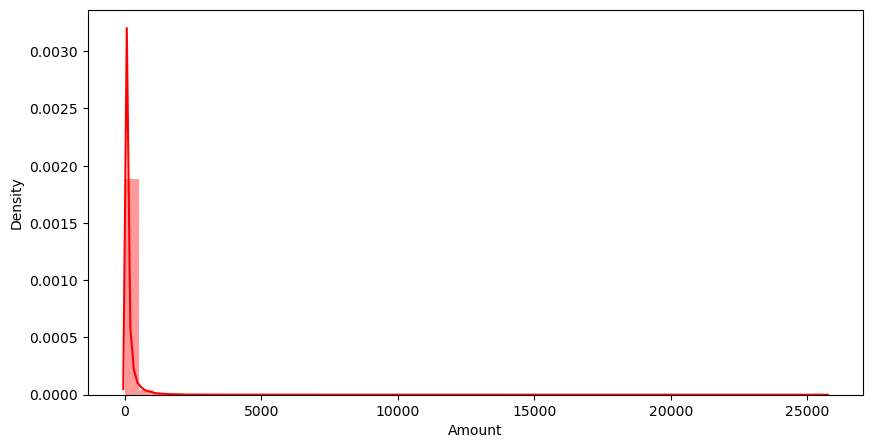

In [155]:
plt.figure(figsize=(10, 5))
sns.distplot(raw_data['Amount'], color='r');

In [156]:
raw_data['Amount']

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

In [157]:
raw_data['Amount'].values

array([149.62,   2.69, 378.66, ...,  67.88,  10.  , 217.  ])

In [158]:
raw_data['Amount'].shape

(284807,)

In [159]:
raw_data['Amount'].values.reshape(-1, 1)

array([[149.62],
       [  2.69],
       [378.66],
       ...,
       [ 67.88],
       [ 10.  ],
       [217.  ]])

In [160]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
amount_n = scaler.fit_transform(raw_data['Amount'].values.reshape(-1, 1))

raw_data_copy = raw_data.iloc[:, 1:-2]
raw_data_copy['Amount_Scaled'] = amount_n
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


- 다시 데이터 나누기

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(raw_data_copy, y, test_size=0.3, 
                                                    random_state=13, stratify=y)  # stratify: 불균형성

In [162]:
%%time

result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

CPU times: user 5min 26s, sys: 6.93 s, total: 5min 33s
Wall time: 49.6 s


In [163]:
result

,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.999169,0.888889,0.594595,0.712551,0.797233
DecitionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999520,0.949580,0.763514,0.846442,0.881722


- 모델별 roc curve

In [164]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10, 10))

    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])

    plt.plot([0, 1], [0, 1], 'k--', label='random guess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()

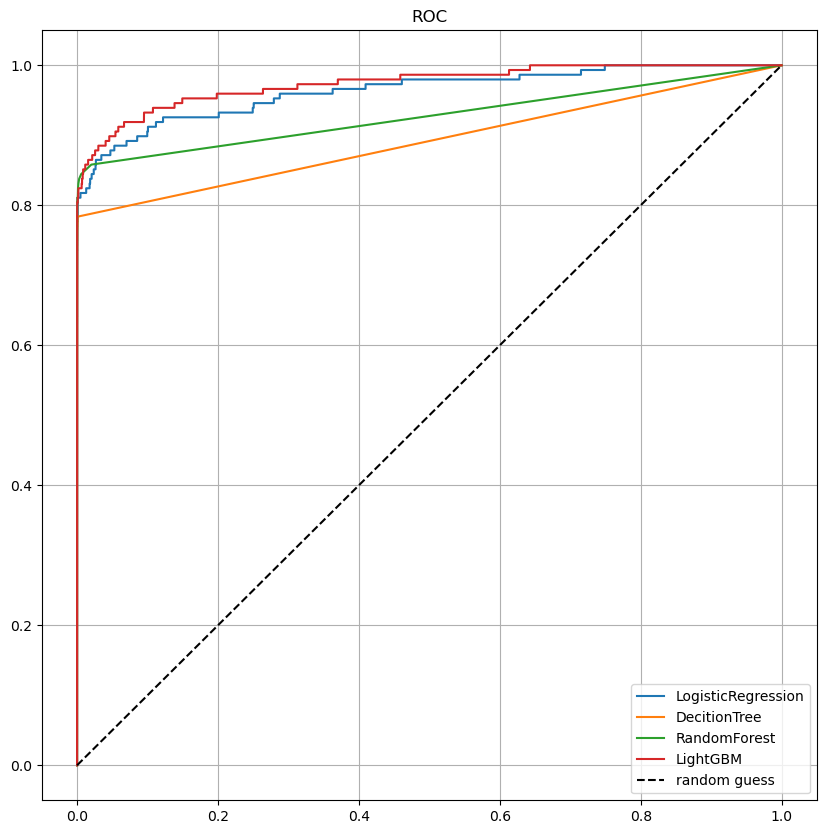

In [165]:
draw_roc_curve(models, model_names, X_test, y_test)

--> lightGBM이 좋아보임

log scale 시도

In [166]:
amount_log = np.log1p(raw_data['Amount'])

raw_data_copy['Amount_Scaled'] = amount_log

/var/folders/fh/vxh95w0j5xj_qtlt37_93z2m0000gn/T/ipykernel_91507/4190988737.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data_copy['Amount_Scaled'], color='r')


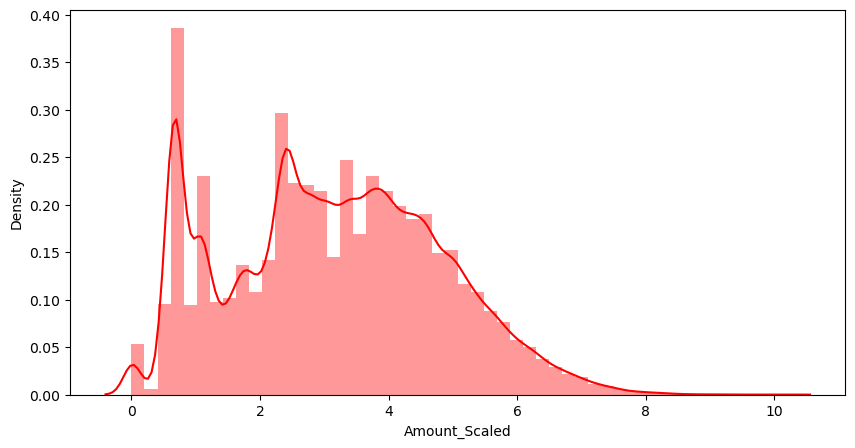

In [167]:
plt.figure(figsize=(10, 5))
sns.distplot(raw_data_copy['Amount_Scaled'], color='r')

plt.show()

- 분포 변화함

다시 성능 확인

In [168]:
%%time

X_train, X_test, y_train, y_test = train_test_split(raw_data_copy, y, test_size=0.3, 
                                                    random_state=13, stratify=y)  # stratify: 불균형성


result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

result

CPU times: user 5min 34s, sys: 11 s, total: 5min 45s
Wall time: 1min


,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.999157,0.887755,0.587838,0.707317,0.793854
DecisionTree,0.999345,0.883333,0.716216,0.791045,0.858026
RandomForest,0.999497,0.956522,0.743243,0.836502,0.871592
LightGBM,0.999532,0.950000,0.770270,0.850746,0.885100


큰 변화는 없음

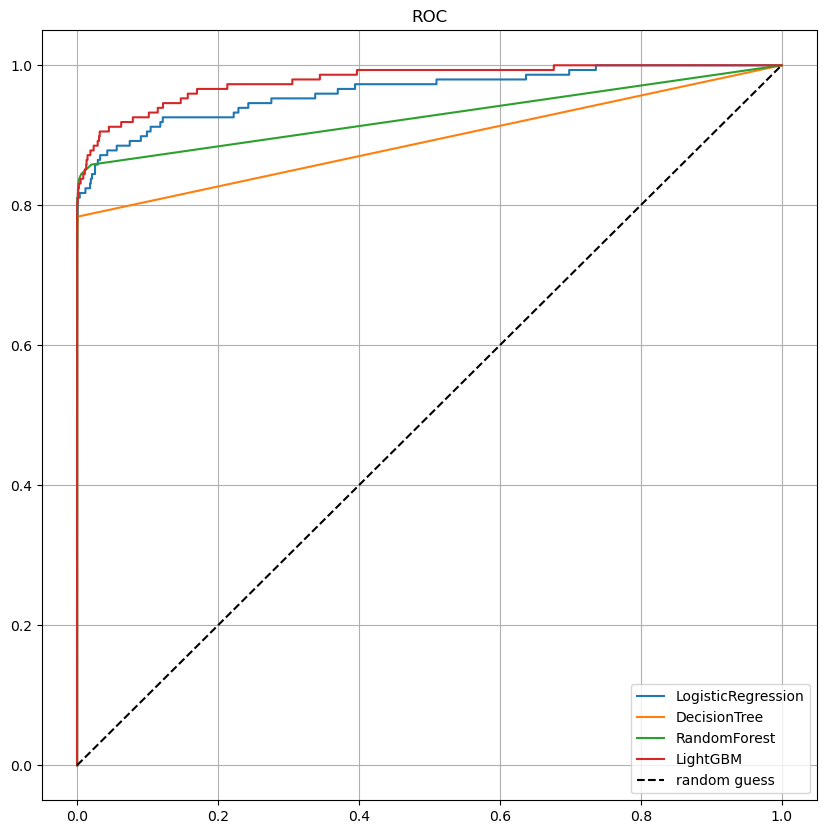

In [169]:
draw_roc_curve(models, model_names, X_test, y_test)

## 3rd trial - outlier 정리

- 특이 데이터

In [170]:
# outlier의 index 반환
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class']==1][column]  # fraud 데이터에 대해서만 outlier 확인

    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight

    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index

    return outlier_index

In [171]:
get_outlier(df=raw_data, column='V14')

Index([8296, 8615, 9035, 9252], dtype='int64')

- outlier 제거

In [172]:
raw_data.shape

(284807, 31)

In [173]:
outlier_index = get_outlier(df=raw_data, column='V14')
raw_data_copy.drop(outlier_index, axis=0, inplace=True)
raw_data_copy.shape

(284803, 29)

--> outlier 제거됨

outlier 제거하고 데이터 나누기

In [174]:
X = raw_data_copy  # raw data에 scaler 적용한 것, y값은 없었음

# raw data에서 outlier 제거 후 y값 받아옴
raw_data.drop(outlier_index, axis=0, inplace=True)
y = raw_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

In [175]:
%%time

X_train, X_test, y_train, y_test = train_test_split(raw_data_copy, y, test_size=0.3, 
                                                    random_state=13, stratify=y)  # stratify: 불균형성


result = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

result

CPU times: user 5min 24s, sys: 7.35 s, total: 5min 32s
Wall time: 56.9 s


,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.999286,0.904762,0.650685,0.756972,0.825284
DecisionTree,0.999427,0.870229,0.780822,0.823105,0.890311
RandomForest,0.999497,0.918699,0.773973,0.840149,0.886928
LightGBM,0.999602,0.951613,0.808219,0.874074,0.904074


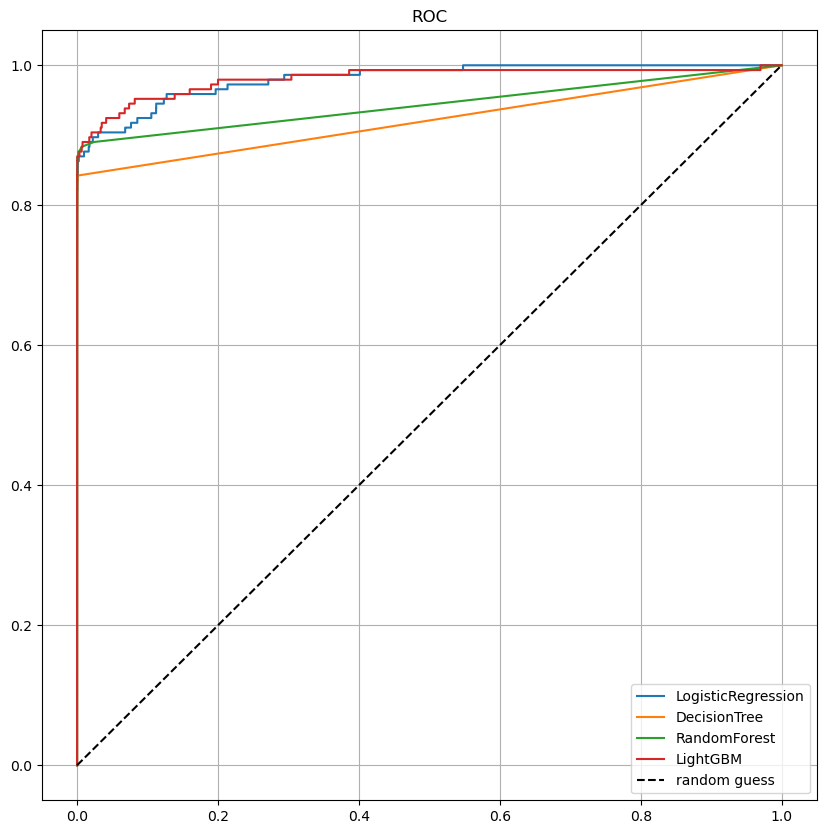

In [176]:
draw_roc_curve(models, model_names, X_test, y_test)

## 4th trial - SMOTE oversampling

- oversampling, undersampling
- oversampling기법 중 하나 -  SMOTE(kNN 기법)

SMOTE 적용

In [177]:
# %pip install imbalanced-learn

In [178]:
from imblearn.over_sampling import  SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

- test 데이터는 건드리지 않음
- smote.fit_resample 에러: nontype은 split 안됨 --> scikit-learn 1.0.2 버전으로 downgrade

데이터 증강 효과

In [179]:
X_train.shape, y_train.shape

((199362, 29), (199362,))

In [180]:
X_train_over.shape, y_train_over.shape

((398040, 29), (398040,))

In [181]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

(array([0, 1]), array([199020,    342]))
(array([0, 1]), array([199020, 199020]))


불균형했었는데 맞춰짐 (344 -> 199020)

In [182]:
%%time

result = get_result_pd(models, model_names, X_train_over, y_train_over, X_test, y_test)

result

CPU times: user 10min 34s, sys: 22.5 s, total: 10min 56s
Wall time: 1min 46s


,accuracy,precision,recall,f1,roc_auc
LogisticRegression,0.975609,0.059545,0.897260,0.111679,0.936502
DecisionTree,0.968984,0.046048,0.869863,0.087466,0.919509
RandomForest,0.999532,0.873239,0.849315,0.861111,0.924552
LightGBM,0.999532,0.873239,0.849315,0.861111,0.924552


In [183]:
# %pip install -U threadpoolctl
# %pip uninstall scikit-learn

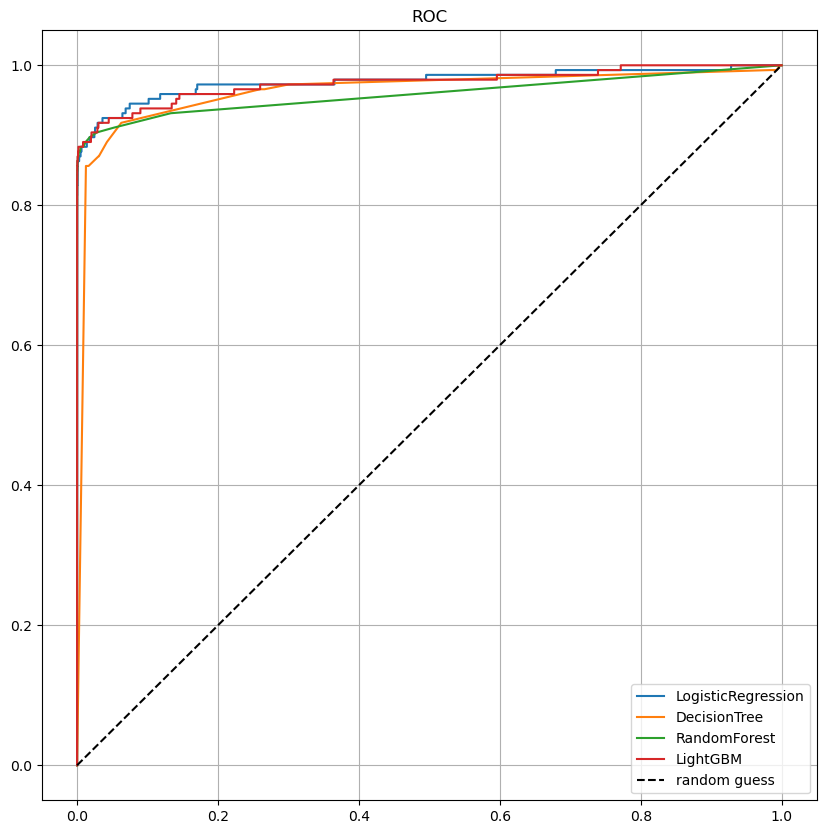

In [184]:
draw_roc_curve(models, model_names, X_test, y_test)